In [ ]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers

In [ ]:
df = pd.read_csv("/content/dataset (1).csv")

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class_ASD'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jaundice         704 non-null    object
 14  autism           704 non-null    object
 15  country_of_res   704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [ ]:
categorical_columns = df.select_dtypes(include='O').columns.tolist()

In [ ]:
categorical_columns

['age',
 'gender',
 'ethnicity',
 'jaundice',
 'autism',
 'country_of_res',
 'used_app_before',
 'age_desc',
 'relation',
 'Class_ASD']

In [ ]:
for i in categorical_columns:
    print("unique values in-"+ i,df[i].unique())

unique values in-age ['26' '24' '27' '35' '40' '36' '64' '29' '17' '33' '18' '31' '43' '37'
 '55' '34' '53' '20' '30' '21' '383' '47' '28' '32' '44' '19' '45' '42'
 '22' '39' '25' '38' '23' '54' '60' '50' '41' '46' '56' '58' '61' '59'
 '52' '48' '51' '49' '?']
unique values in-gender ['f' 'm']
unique values in-ethnicity ['White-European' 'Latino' '?' 'Others' 'Asian' "'Middle Eastern '"
 'Pasifika' 'Black' "'South Asian'" 'Hispanic' 'Turkish' 'others']
unique values in-jaundice ['no' 'yes']
unique values in-autism ['no' 'yes']
unique values in-country_of_res ["'United States'" 'Brazil' 'Spain' 'Egypt' "'New Zealand'" 'Bahamas'
 'Austria' 'Argentina' 'Jordan' 'Lebanon' "'South Africa'" 'Italy'
 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 "'Saudi Arabia'" 'Netherlands' 'Afghanistan' "'United Kingdom'" 'Romania'
 'Sweden' 'Tonga' 'Philippines' 'India' "'Sri Lanka'"
 "'United Arab Emirates'" "'Sierra Leone'" 'Ireland' 'Ethiopia' 'Iran'
 "'Viet Nam'" "'Costa Rica'" 'Germany'

In [ ]:
df[df["age"]=="?"].T

,531,538
A1_Score,0,0
A2_Score,0,1
A3_Score,0,0
A4_Score,0,0
A5_Score,0,1
A6_Score,0,0
A7_Score,0,1
A8_Score,0,0
A9_Score,0,0
A10_Score,0,1


### Row 531 indicates that none of the question were answered and classified as NON AUTISTIC..why???

In [ ]:
df1 = df.copy()

In [ ]:
df1.drop([531,538],0,inplace=True)

In [ ]:
df1.reset_index(drop=True)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,'18 and more',?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,0,0,0,0,0,0,1,1,0,1,17,m,White-European,no,no,Canada,no,3,'18 and more',Self,NO
698,0,0,0,0,0,0,0,1,0,0,56,m,?,no,no,Iraq,no,1,'18 and more',?,NO
699,0,0,1,0,0,0,1,1,0,0,50,f,'Middle Eastern ',no,no,'New Zealand',no,3,'18 and more',Parent,NO
700,0,0,0,0,1,0,0,0,0,0,31,f,Asian,yes,no,India,no,1,'18 and more',Self,NO


In [ ]:
df1["age"] = pd.to_numeric(df1["age"])

In [ ]:
df1[df1["age"]>80].T

,29
A1_Score,1
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [ ]:
### Row 29 has also been classified as NON AUTISTIC but only 1 question has been answered...why? and age is and outlier(Should be removed or changed???)

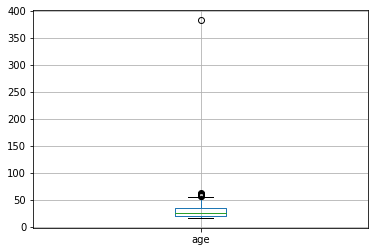

In [ ]:
df1.boxplot(column=["age"])
plt.show()

In [ ]:
df1.drop([29],0,inplace=True)

In [ ]:
df1.shape

(701, 21)

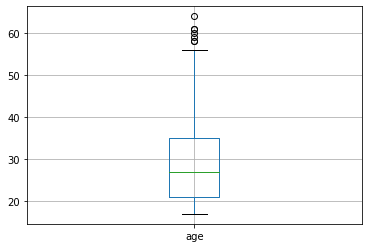

In [ ]:
df1.boxplot(column=["age"])
plt.show()

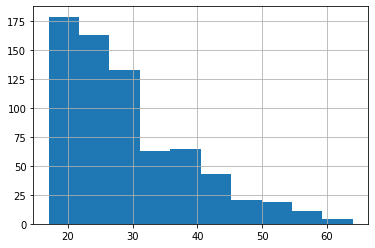

In [ ]:
df1.age.hist()

## The age colum distribution doest look like a normal distribution

In [ ]:
df1["Class_ASD"].value_counts()

NO      512
YES     188
YES}      1
Name: Class_ASD, dtype: int64

In [ ]:
df1.replace("}","",regex=True,inplace=True)

In [ ]:
df1["Class_ASD"].value_counts()

NO     512
YES    189
Name: Class_ASD, dtype: int64

In [ ]:
ques_df = df1.iloc[:,0:10]
ques_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,1,1,1,1,0,0,1,1,0,0
1,1,1,0,1,0,0,0,1,0,1
2,1,1,0,1,1,0,1,1,1,1
3,1,1,0,1,0,0,1,1,0,1
4,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
699,0,0,0,0,0,0,1,1,0,1
700,0,0,0,0,0,0,0,1,0,0
701,0,0,1,0,0,0,1,1,0,0
702,0,0,0,0,1,0,0,0,0,0


In [ ]:
ques_df.sum()

A1_Score     507
A2_Score     318
A3_Score     322
A4_Score     349
A5_Score     350
A6_Score     200
A7_Score     293
A8_Score     457
A9_Score     228
A10_Score    403
dtype: int64

## Handling invalid data in Relation column

In [ ]:
df1.relation.value_counts()

Self                          521
?                              93
Parent                         50
Relative                       28
Others                          5
'Health care professional'      4
Name: relation, dtype: int64

In [ ]:
df1.loc[(df1["relation"]=="?"),"relation"]="Self"

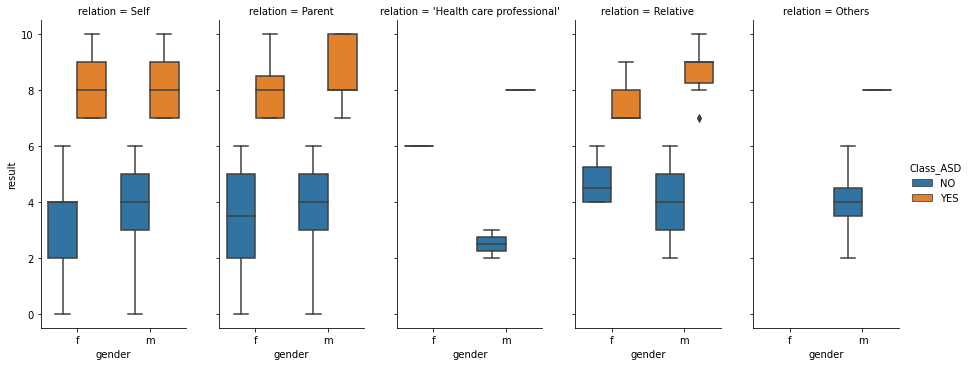

In [ ]:
sns.catplot(x="gender",y="result",col="relation",data=df1,kind="box",hue="Class_ASD",aspect=.5)
sns.set_style("darkgrid")

In [ ]:
le = LabelEncoder()

In [ ]:
df1.reset_index(drop=True)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class_ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,'18 and more',Self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0,0,0,0,0,0,1,1,0,1,17,m,White-European,no,no,Canada,no,3,'18 and more',Self,NO
697,0,0,0,0,0,0,0,1,0,0,56,m,?,no,no,Iraq,no,1,'18 and more',Self,NO
698,0,0,1,0,0,0,1,1,0,0,50,f,'Middle Eastern ',no,no,'New Zealand',no,3,'18 and more',Parent,NO
699,0,0,0,0,1,0,0,0,0,0,31,f,Asian,yes,no,India,no,1,'18 and more',Self,NO


In [ ]:
df1["Class_ASD"] = le.fit_transform(df1["Class_ASD"])

In [ ]:
df1["Class_ASD"].value_counts()

0    512
1    189
Name: Class_ASD, dtype: int64

In [ ]:
df1[["age","gender","result","Class_ASD"]].head()

,age,gender,result,Class_ASD
0,26,f,6,0
1,24,m,5,0
2,27,m,8,1
3,35,f,6,0
4,40,f,2,0


In [ ]:
df1["gender"] = le.fit_transform(df1["gender"])
df1.gender

0      0
1      1
2      1
3      0
4      0
      ..
699    1
700    1
701    0
702    0
703    0
Name: gender, Length: 701, dtype: int64

In [ ]:
age_result_class = df1[["age","result","Class_ASD","gender"]]
age_result_class.head()

,age,result,Class_ASD,gender
0,26,6,0,0
1,24,5,0,1
2,27,8,1,1
3,35,6,0,0
4,40,2,0,0


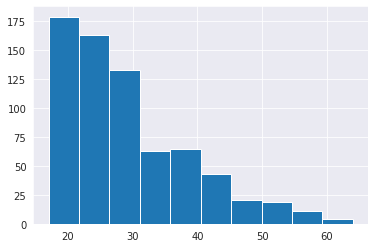

In [ ]:
df1["age"].hist()

In [ ]:
age_temp = df1["age"]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


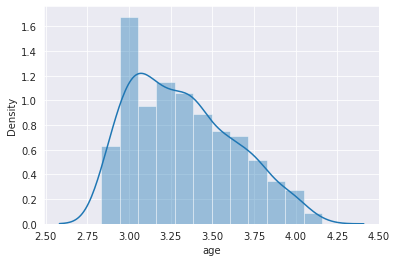

In [ ]:
sns.distplot(np.log(age_temp))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


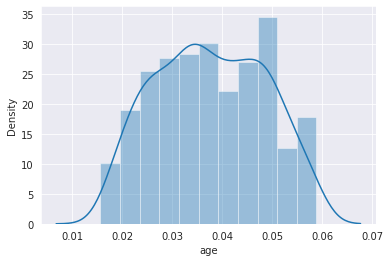

In [ ]:
sns.distplot(1/age_temp)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


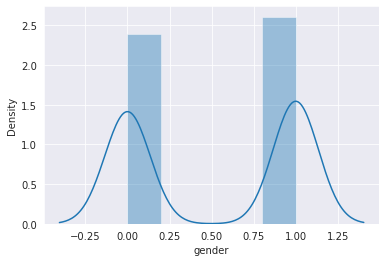

In [ ]:
sns.distplot(df1["gender"])

In [ ]:
age_result_class[age_result_class["result"]==0]

,age,result,Class_ASD,gender
515,27,0,0,0
523,18,0,0,1
543,25,0,0,1
547,26,0,0,0
559,36,0,0,1
585,26,0,0,1
591,40,0,0,1
592,44,0,0,0
594,40,0,0,0
600,20,0,0,1


In [ ]:
scale = MinMaxScaler()

In [ ]:
ohe = OneHotEncoder()

In [ ]:
joint_df = pd.concat([ques_df,age_result_class],axis=1)

In [ ]:
joint_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class_ASD,gender
0,1,1,1,1,0,0,1,1,0,0,26,6,0,0
1,1,1,0,1,0,0,0,1,0,1,24,5,0,1
2,1,1,0,1,1,0,1,1,1,1,27,8,1,1
3,1,1,0,1,0,0,1,1,0,1,35,6,0,0
4,1,0,0,0,0,0,0,1,0,0,40,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,0,0,0,0,0,1,1,0,1,17,3,0,1
700,0,0,0,0,0,0,0,1,0,0,56,1,0,1
701,0,0,1,0,0,0,1,1,0,0,50,3,0,0
702,0,0,0,0,1,0,0,0,0,0,31,1,0,0


In [ ]:
#scaling data
scaled_data = joint_df.copy()

In [ ]:
scaled_data = scale.fit_transform(scaled_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


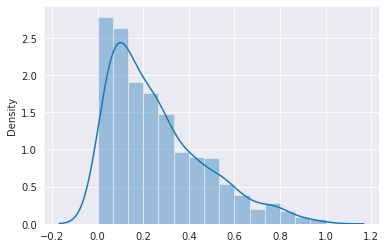

In [ ]:
sns.distplot(scaled_data[:,10])

In [ ]:
transform_scale = joint_df.copy()

In [ ]:
transform_scale.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class_ASD,gender
0,1,1,1,1,0,0,1,1,0,0,26,6,0,0
1,1,1,0,1,0,0,0,1,0,1,24,5,0,1
2,1,1,0,1,1,0,1,1,1,1,27,8,1,1
3,1,1,0,1,0,0,1,1,0,1,35,6,0,0
4,1,0,0,0,0,0,0,1,0,0,40,2,0,0


In [ ]:
transform_scale["age"] = 1/transform_scale["age"]

In [ ]:
transform_scale.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class_ASD,gender
0,1,1,1,1,0,0,1,1,0,0,0.038462,6,0,0
1,1,1,0,1,0,0,0,1,0,1,0.041667,5,0,1
2,1,1,0,1,1,0,1,1,1,1,0.037037,8,1,1
3,1,1,0,1,0,0,1,1,0,1,0.028571,6,0,0
4,1,0,0,0,0,0,0,1,0,0,0.025000,2,0,0


In [ ]:
transform_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 703
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1_Score   701 non-null    int64  
 1   A2_Score   701 non-null    int64  
 2   A3_Score   701 non-null    int64  
 3   A4_Score   701 non-null    int64  
 4   A5_Score   701 non-null    int64  
 5   A6_Score   701 non-null    int64  
 6   A7_Score   701 non-null    int64  
 7   A8_Score   701 non-null    int64  
 8   A9_Score   701 non-null    int64  
 9   A10_Score  701 non-null    int64  
 10  age        701 non-null    float64
 11  result     701 non-null    int64  
 12  Class_ASD  701 non-null    int64  
 13  gender     701 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 102.1 KB


In [ ]:
transform_scale

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class_ASD,gender
0,1,1,1,1,0,0,1,1,0,0,0.038462,6,0,0
1,1,1,0,1,0,0,0,1,0,1,0.041667,5,0,1
2,1,1,0,1,1,0,1,1,1,1,0.037037,8,1,1
3,1,1,0,1,0,0,1,1,0,1,0.028571,6,0,0
4,1,0,0,0,0,0,0,1,0,0,0.025000,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,0,0,0,0,0,1,1,0,1,0.058824,3,0,1
700,0,0,0,0,0,0,0,1,0,0,0.017857,1,0,1
701,0,0,1,0,0,0,1,1,0,0,0.020000,3,0,0
702,0,0,0,0,1,0,0,0,0,0,0.032258,1,0,0


In [ ]:
transform_scale1 = transform_scale.copy()

In [ ]:
train

In [ ]:
tf.random.set_seed(13)

##Splitting the dataset

In [ ]:
transform_scale = transform_scale.sample(frac=1)

In [ ]:
train_df,test_df = train_test_split(transform_scale,test_size=0.4)

print(train_df.shape)
print(test_df.shape)

(420, 14)
(281, 14)


In [ ]:
#splitting into testing and validation dataset from test_df
y_test,valid_test = train_test_split(test_df,test_size=0.5)

print(y_test.shape)
print(valid_test.shape)

(140, 14)
(141, 14)


In [ ]:
X_train = train_df.drop("Class_ASD",axis=1)
y_train = train_df["Class_ASD"]

print(X_train.shape)
print(y_train.shape)

(420, 13)
(420,)


In [ ]:
X_test1 = y_test.drop("Class_ASD",axis=1)
y_test1 =  y_test["Class_ASD"]

print(X_test1.shape)
print(y_test1.shape)

(140, 13)
(140,)


In [ ]:
train_valid = valid_test.drop("Class_ASD",axis=1)
test_valid = valid_test["Class_ASD"]

print(train_valid.shape)
print(test_valid.shape)

(141, 13)
(141,)


In [ ]:
X_train = scale.fit_transform(X_train)
X_test1 = scale.fit_transform(X_test1)
train_valid = scale.fit_transform(train_valid)

In [ ]:
def build_model():

  model = Sequential()

  model.add(Dense(32, input_shape = (X_train.shape[1],)))

  model.add(Dense(32,Activation('relu')))
  model.add(Dense(64,Activation('relu')))
  model.add(Dense(128,Activation('relu')))
  model.add(Dense(1,Activation('sigmoid')))
  learning_rate = 0.00001
  #optimizer = optimizers.SGD(learning_rate)
  optimizer = optimizers.Adam(learning_rate)
  model.compile(optimizer=optimizer,loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
  return model

In [ ]:
model2 = build_model()

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 12,065
Trainable params: 12,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model2.fit(X_train,y_train,batch_size=16,epochs=500,validation_data=(train_valid,test_valid))

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:5017: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


27/27 [==============================] - 1s 7ms/step - loss: 0.7014 - accuracy: 0.4810 - val_loss: 0.6974 - val_accuracy: 0.5035
Epoch 2/500
27/27 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.5000 - val_loss: 0.6944 - val_accuracy: 0.5461
Epoch 3/500
27/27 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5357 - val_loss: 0.6915 - val_accuracy: 0.5887
Epoch 4/500
27/27 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5667 - val_loss: 0.6887 - val_accuracy: 0.5957
Epoch 5/500
27/27 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5905 - val_loss: 0.6858 - val_accuracy: 0.5957
Epoch 6/500
27/27 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.6048 - val_loss: 0.6829 - val_accuracy: 0.6241
Epoch 7/500
27/27 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.6333 - val_loss: 0.6801 - val_accuracy: 0.6596
Epoch 8/500
27/27 [======

In [ ]:
history.history["accuracy"][-1]

0.9904761910438538

In [ ]:
history.history["val_accuracy"][-1]

0.936170220375061

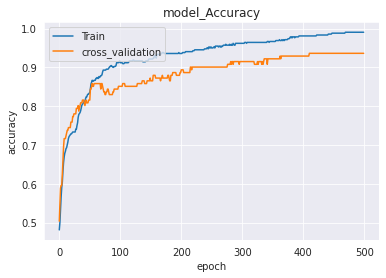

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('model_Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train',"cross_validation"],loc='upper left')
plt.show()

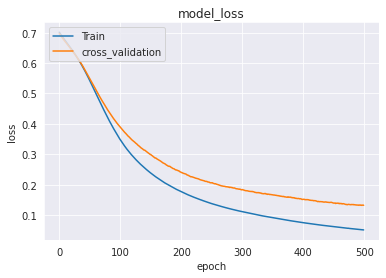

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train',"cross_validation"],loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model2.evaluate(train_valid,test_valid,verbose=2)
print("Accuracy : {:5.2f}".format(accuracy))

5/5 - 0s - loss: 0.1322 - accuracy: 0.9362
Accuracy :  0.94


In [ ]:
loss, accuracy1 = model2.evaluate(X_test1,y_test1,verbose=2)
print("Accuracy : {:5.2f}".format(accuracy1))

5/5 - 0s - loss: 0.0923 - accuracy: 0.9643
Accuracy :  0.96


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model2.predict(X_test1)

In [ ]:
y_pred > 0.5

array([[False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [ ]:
print(confusion_matrix(y_test1,y_pred>0.5))

[[104   4]
 [  1  31]]


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,auc

In [ ]:
roc = roc_auc_score(y_test1,y_pred>0.5)

In [ ]:
roc_auc = auc(fpr,tpr)

In [ ]:
roc

0.9658564814814815

In [ ]:
fpr, tpr, threshold = roc_curve(y_test1,y_pred)

In [ ]:
fpr

array([0.        , 0.        , 0.        , 0.00925926, 0.00925926,
       0.02777778, 0.02777778, 0.0462963 , 0.0462963 , 0.92592593,
       0.94444444, 1.        ])

In [ ]:
tpr

array([0.     , 0.03125, 0.8125 , 0.8125 , 0.84375, 0.84375, 0.96875,
       0.96875, 1.     , 1.     , 1.     , 1.     ])

In [ ]:
threshold

array([1.9989160e+00, 9.9891603e-01, 8.5784215e-01, 8.5549712e-01,
       7.9098594e-01, 7.7295291e-01, 5.5798864e-01, 4.1171333e-01,
       3.5099301e-01, 1.7665057e-05, 1.7425686e-05, 7.1739430e-07],
      dtype=float32)

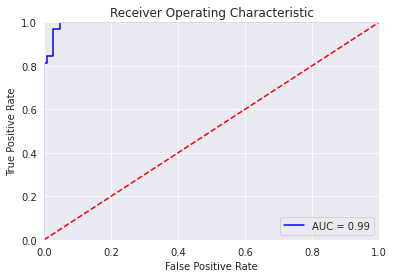

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import plot_roc_curve